## Blue or Green Screen Effect with OpenCV - [Chroma keying]

### Color Thresholds
- As we treat Images as grids of pixels as a function of X and Y, we are gonna use that information of colors to isolate a particular area. Selecting areas of interest. We’ll be selecting an area of interest using Color Thresholds.

- With `Color Thresholds` we can able to remove parts of an image that falls under a specific color range.The common use is with Blue/Green Screen.

- A Blue Screen similar to a green screen is used to layer two images or video streams based on identifying and replacing a large blue area.
- We’re gonna use Green Screen to film now ;p. So, how does it work?
- The first step is to isolate the blue background and replace that green area with an image of your choosing.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('images/green_background.png')

In [3]:
print('Image type: ', type(image), 'Image Dimensions : ', image.shape)

Image type:  <class 'numpy.ndarray'> Image Dimensions :  (1080, 1920, 3)


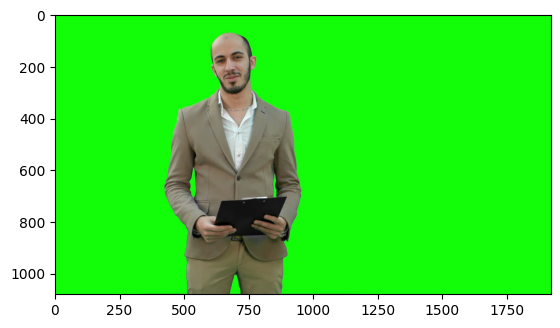

In [4]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

Open CV reads in color images as BGR(blue, green, red) images, not as RGB(red, blue, green). So, the Red and Blue colors are in reverse order and pyplot reflect this switch and results in a differently coloured image than original.

So, before we display the image let’s make a copy of the original image and use Open CV to change colour from BGR to RGB. It’s good practice to always make a copy of the image you’re working with. This way any transformation you’ll apply to the copy will not affect the original image, so it’s easier to undo a step or try something new.

Now, on this copied image image_copy we can perform a colour transformation using Open CV function cvtColor() , this takes a source image and colour conversion code, in this case, it is just BGR2RGB and then outputs the desired image.

### Defining the Color Threshold

Now, we need to create a color threshold to remove the desired green region. To create a Color Threshold, we need to define lower and upper bounds for the color that we need to isolate and remove -blue

we’ll be using the color threshold values to eventually select the green screen area that contains this range of color values and get rid of it.

In [5]:
# Define lower and upper bounds for the green color range
lower_green = np.array([0, 100, 0])     # [R value, G value, B value]
upper_green = np.array([100, 255, 100])

So, we defined the low threshold that contains the lowest values of red, green and blue that are still considered part of the green screen background.

In lower_green , for red and blue, we set as 0, meaning it’s okay to have no red or blue. But, the lowest value for green should still be quite high, let’s say around 100.

Now, for upper_green defined the upper threshold to allow little more red and blue, and set the highest value for green to 255. Any color within this low and high range will be an intense green color. this is just an estimation though. So, if we find that this range isn’t finding the green screen area we want, we can get back and change the values.

### Creating a Mask
We are gonna use the color bound that are just created to create an image mask.
Masks are very common way to isolate a selected area of interest and do something with that area. We can create a mask over green area using Open CV’s inRange() function.

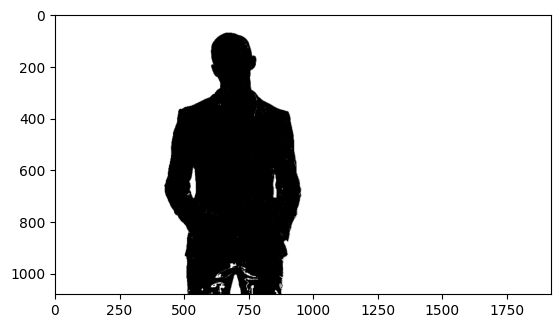

In [6]:
mask = cv2.inRange(image_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

The whole white area is where the image will be allowed to show through and the black will be blocked out. In numerical values, we can look at this mask as a 2D grid with the same dimensions as our image 720 pixels in height and 816 pixels in width.

Each coordinate in the mask has a value of either 255 for white and 0 for black, sort of like a grayscale image. And when we look at this mask we can see that it has a white area where the green screen background is and the black area where the man is.

Now, the first thing we need to do is let the man show through and block the green screen background.

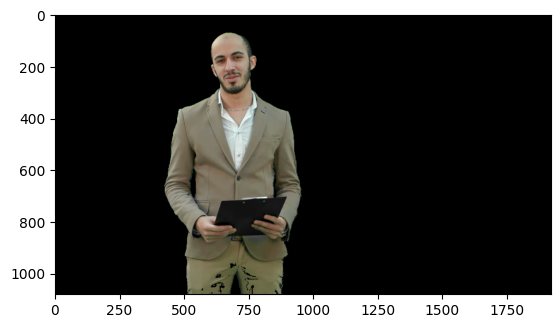

In [7]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

First, to mask the image we are gonna make another image copy called maksed_image of our colour changed image copy, just in case I want to change the mask later on.

Then one way to select the green screen is by asking for the part of that image that overlaps with the part of the mask that is white or not black. That is we’ll select the part of the image where the area of the mask is not equal to zero, using mask != 0 . And to block this background area out we then set the pixels to black. Now when we display our result, that should show the man area is the only area that should show through.

### Mask and Add Background Image

Now, we just have one last step which is to apply a background to this image. The process is fairly similar.

In [11]:
background_image = cv2.imread('images/background_nature.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Print dimensions to debug
print("Background image dimensions:", background_image.shape)
print("Mask dimensions before resize:", mask.shape)

Background image dimensions: (1200, 1600, 3)
Mask dimensions before resize: (1080, 1920)


In [12]:
# Resize mask to match background dimensions if needed
mask_resized = cv2.resize(mask, (background_image.shape[1], background_image.shape[0]))
print("Mask dimensions after resize:", mask_resized.shape)


Mask dimensions after resize: (1200, 1600)


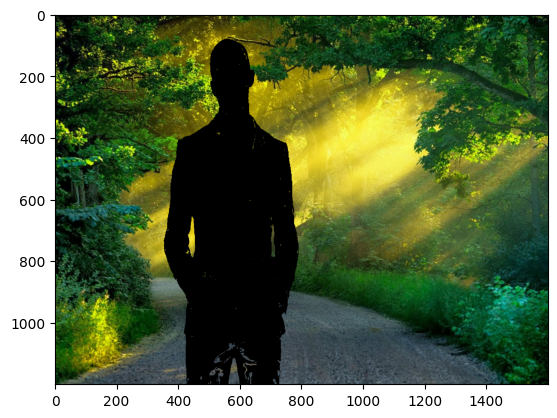

In [13]:
# Apply the resized mask to the background
crop_background = np.copy(background_image)
crop_background[mask_resized == 0] = [0, 0, 0]

# Display the result
plt.imshow(crop_background)
plt.show()

### Final Image

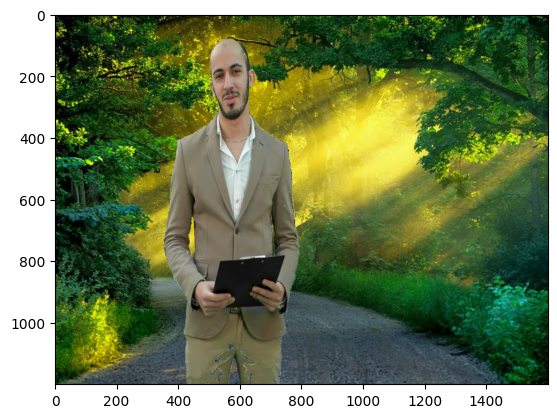

In [15]:
# Resize `masked_image` to match `crop_background` dimensions
masked_image_resized = cv2.resize(masked_image, (crop_background.shape[1], crop_background.shape[0]))

# Combine the images
final_image = crop_background + masked_image_resized
plt.imshow(final_image)
plt.show()